In [113]:
!pip install caer canaro

In [115]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc

In [119]:
IMG_SIZE = (80, 80)
channels = 1
char_path = r'archive/simpsons_dataset'

In [121]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path, char)))
#Sort in descending order:
char_dict = caer.sort_dict(char_dict, descending = True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [123]:
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= 10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [125]:
#Create the training data:
train = caer.preprocess_from_dir(char_path, characters, channels = channels, IMG_SIZE = IMG_SIZE, isShuffle = True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.011418819427490234s
[INFO] At 1000 files
[INFO] 1454 files found in 0.002112865447998047s
[INFO] At 1000 files
[INFO] 1452 files found in 0.002321958541870117s
[INFO] At 1000 files
[INFO] 1354 files found in 0.0019588470458984375s
[INFO] At 1000 files
[INFO] 1342 files found in 0.002103090286254883s
[INFO] At 1000 files
[INFO] 1291 files found in 0.0016632080078125s
[INFO] At 1000 files
[INFO] 1206 files found in 0.001798868179321289s
[INFO] At 1000 files
[INFO] 1194 files found in 0.0015370845794677734s
[INFO] At 1000 files
[INFO] 1193 files found in 0.001798868179321289s
[INFO] At 1000 files
[INFO] 1079 files found in 0.0013699531555175781s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 0m 11s


In [127]:
len(train) #number of lists

13811

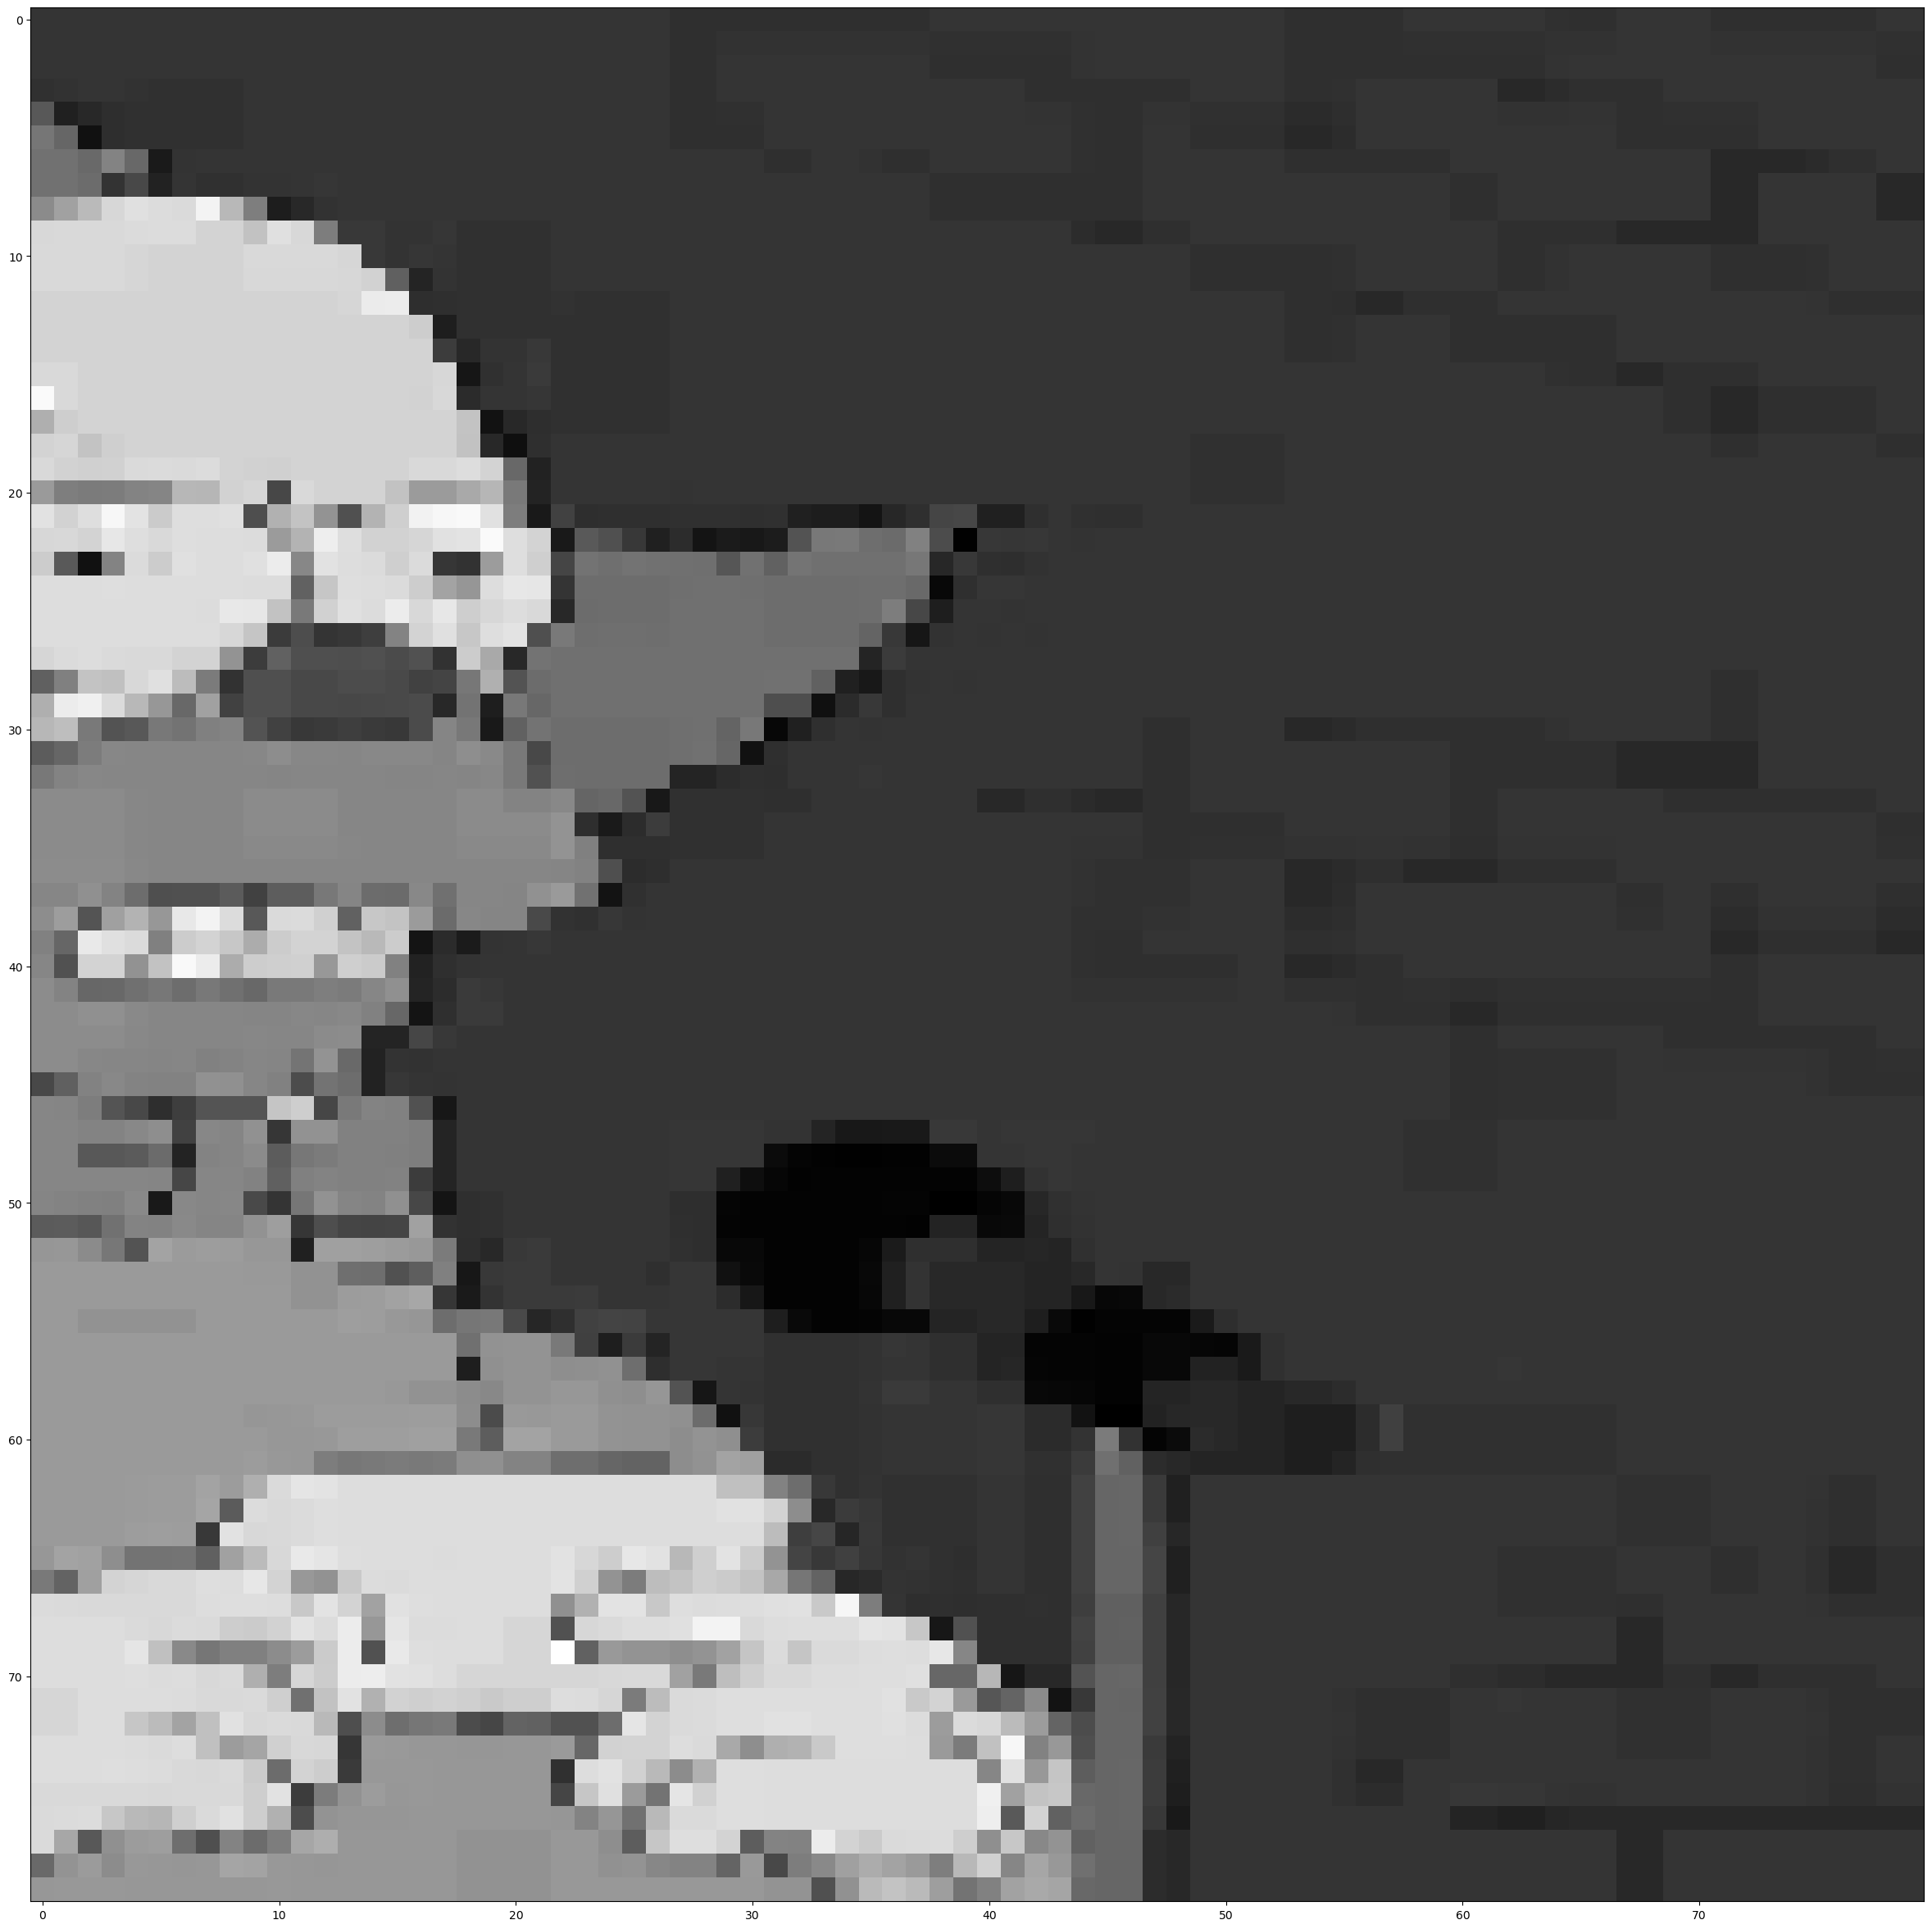

In [129]:
import matplotlib.pyplot as plt
plt.figure(figsize = (30, 30))
plt.imshow(train[0][0], cmap = 'gray')
plt.show()

In [131]:
#Separate training set into features and labels:
featureSet, labels = caer.sep_train(train, IMG_SIZE = IMG_SIZE)

In [133]:
from tensorflow.keras.utils import to_categorical
#Normalize the featureSet ==> (0, 1):
featureSet = caer.normalize(featureSet)
labels = to_categorical(labels, len(characters))

In [135]:
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio = .2)

In [137]:
del train
del featureSet
del labels
gc.collect()

0

In [139]:
BATCH_SIZE = 32
EPOCHS = 10

In [141]:
#Image data generator:
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size = BATCH_SIZE)

In [ ]:
#Creating the model:
model = canaro.models.createSimpsonsModel(IMG_SIZE = IMG_SIZE, channels = channels, output_dims = len(characters),)